# **About Dataset**
Please refer to the official [Github](https://github.com/allisonhorst/palmerpenguins/blob/master/README.md) page for details and license information. The details below have also been taken from there.

Artwork: **@allison_horst**

# **Palmer Archipelago (Antarctica) penguin data**
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Thank you to Dr. Gorman, Palmer Station LTER and the LTER Network! Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use.

# **License & citation**
Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.

Please cite this data using: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

# **Summary:**
`penguins_size.csv`: Simplified data from original penguin data sets. Contains variables:

`species`: penguin species (Chinstrap, Adélie, or Gentoo)

`culmen_length_mm`: culmen length (mm)

`culmen_depth_mm`: culmen depth (mm)

`flipper_length_mm`: flipper length (mm)

`body_mass_g`: body mass (g)

`island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

`sex`: penguin sex



# **Meet the penguins:**

***What are culmen length & depth?***

The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

For this penguin data, the culmen length and culmen depth are measured as shown below (thanks Kristen Gorman for clarifying!):



# **Data:**
For more info, you can refer here: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv

In [208]:
# Load needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve 
print("Imported Needed Libraries 😅")

# Remove Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Get the data
URL = "https://raw.githubusercontent.com/muhammadanas0716/Data-Science-Projects---EDA/main/11.%20Penguins%20Dataset%20-%20Analysis/penguins.csv"
penguins_df = pd.read_csv(URL)

print("Data Imported Successfully 🚀")

Imported Needed Libraries 😅
Data Imported Successfully 🚀


In [209]:
# Get first 5 rows of data
penguins_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [210]:
# Get last 5 rows of data
penguins_df.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [211]:
# Get all Null values
pd.DataFrame(penguins_df.isnull().sum(axis = 0))

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [212]:
# Delete all NAN rows
penguins_df = penguins_df.dropna()

⬆️ Now we're done with the Data Clearning process, now let's move to my and your favourtite part - **Data Visualization**!

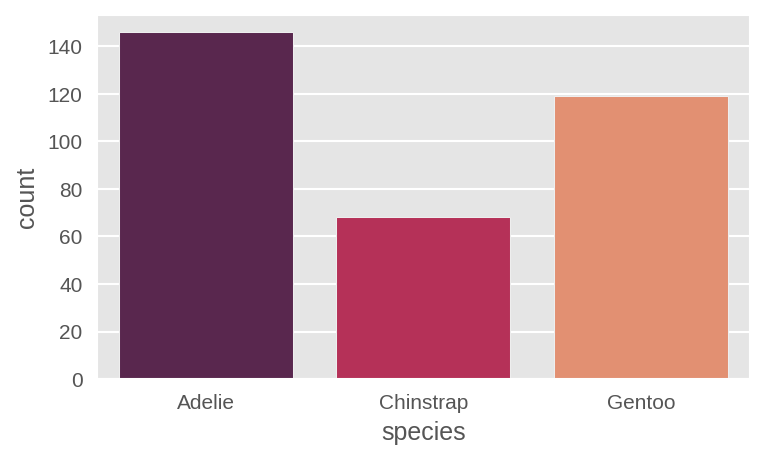

In [213]:
# Get the Count Plots for some columns
def countplot(data, column, hue=None):
  plt.figure(figsize=(5, 3), dpi=150)
  sns.countplot(data=data, x=column, hue=hue, palette="rocket")
  plt.show()

countplot(penguins_df, "species") # Count plot for Species

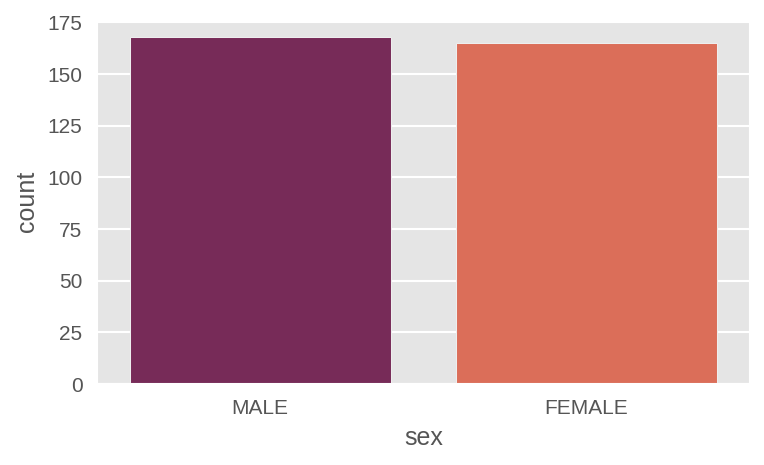

In [214]:
countplot(penguins_df, "sex") # Count plot for Sex


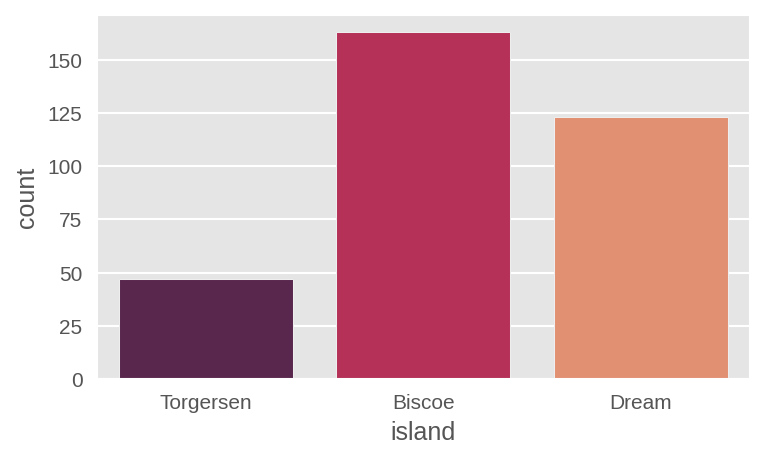

In [215]:
countplot(penguins_df, "island") # Count plot for Island

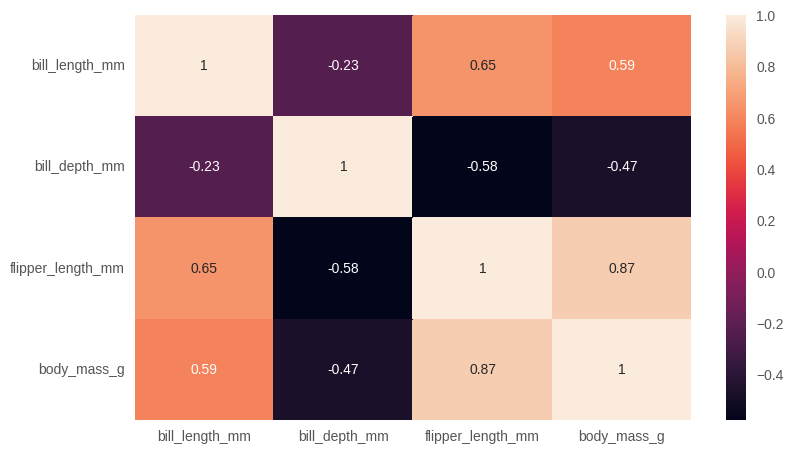

In [216]:
# Get correlations of data via Heatmap
plt.figure(figsize=(8, 5), dpi=100)

# Create the Correlation Martix
penguins_corr = penguins_df.corr()

# Plot
sns.heatmap(penguins_corr, annot=True)

# Show
plt.show()

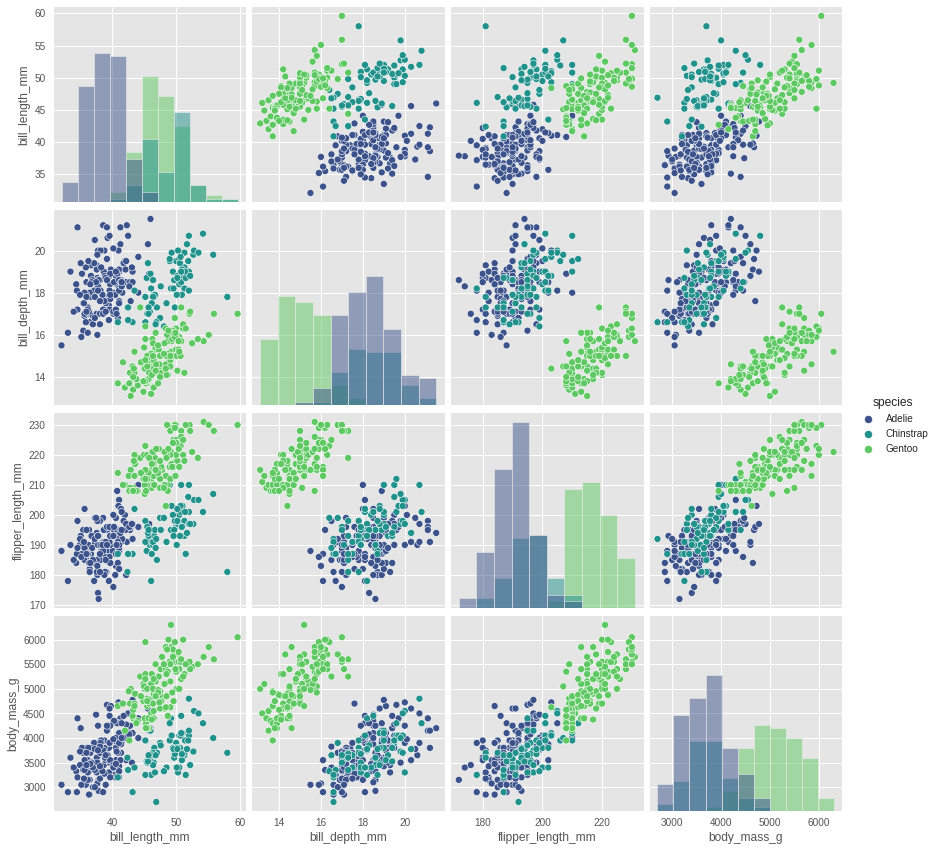

In [217]:
# Get some intution on Species

# Plot
sns.pairplot(penguins_df, hue="species", diag_kind="hist", palette="viridis", height=3)

# Show
plt.show()

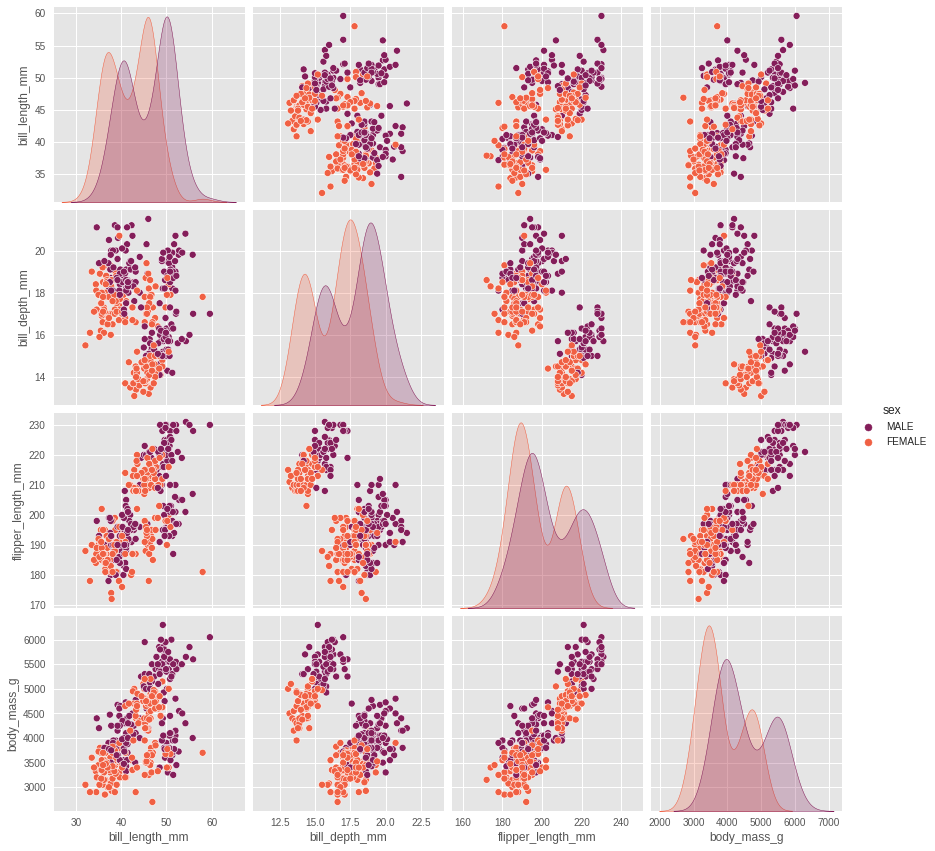

In [218]:
# Get some intution on Sex

# Plot
sns.pairplot(penguins_df, hue="sex", palette="rocket", height=3)

# Show
plt.show()

In [219]:
# Get the Relationship between Sex and features of the penguins 
def scatterplot(data, x, y, hue,title):
  # Set Plot Settings
  plt.style.use("fivethirtyeight")
  fig, axes = plt.subplots(2, 2, figsize=(15,15)) 
  fig.suptitle(title, fontsize=16)

  # Plot 3-4 Graphs
  sns.scatterplot(data=data, x=x, y=y, hue=hue, palette="rocket", ax=axes[0,0])
  sns.kdeplot(data=data, x=x, y=y, hue=hue, palette="rocket", ax=axes[0, 1], fill="True")
  sns.histplot(data=data, x=x, y=y, hue=hue, palette="rocket", ax=axes[1,0])
  # sns.anyplotyoulike(data=data, x=x, y=y, hue=hue, palette="rocket", ax=axes[1,1]) # Add any plot to your liking

  # Show the Plot
  plt.show()

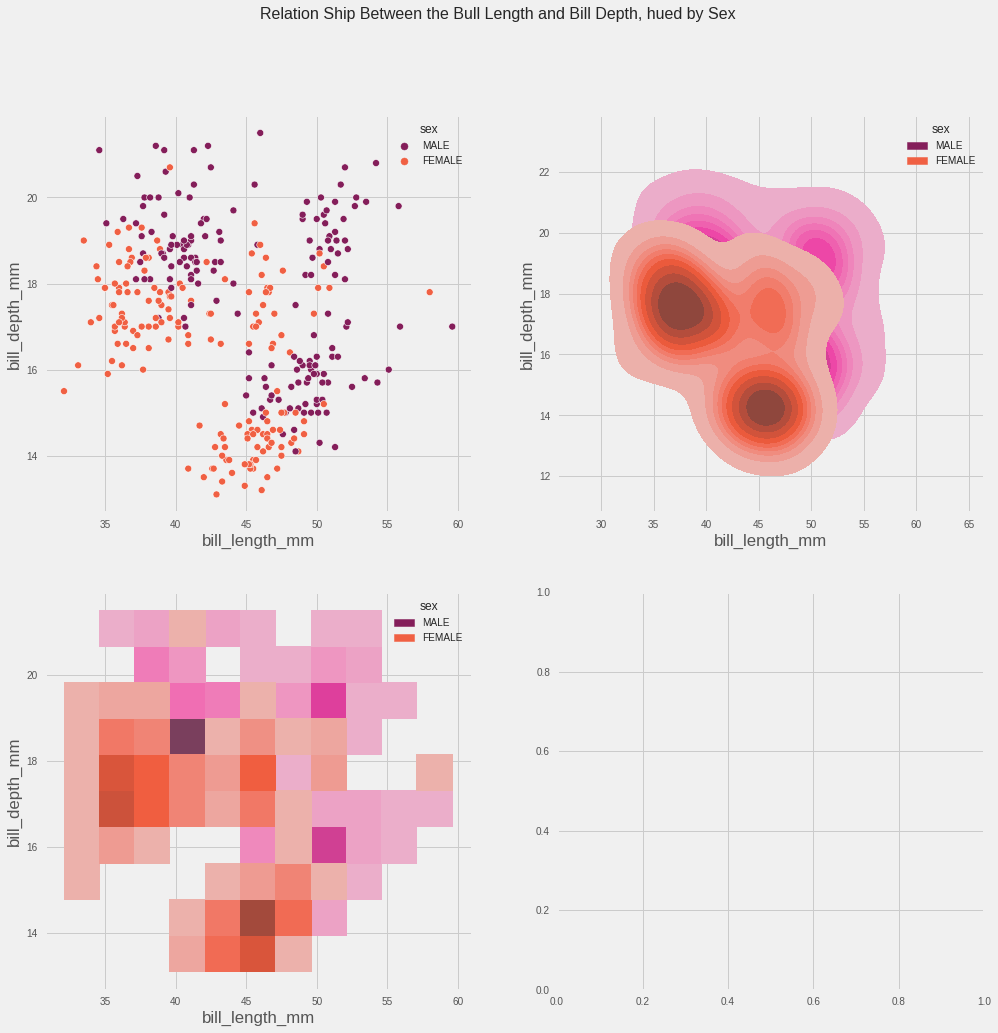

In [220]:
scatterplot(penguins_df, "bill_length_mm", "bill_depth_mm", "sex", "Relation Ship Between the Bull Length and Bill Depth, hued by Sex")

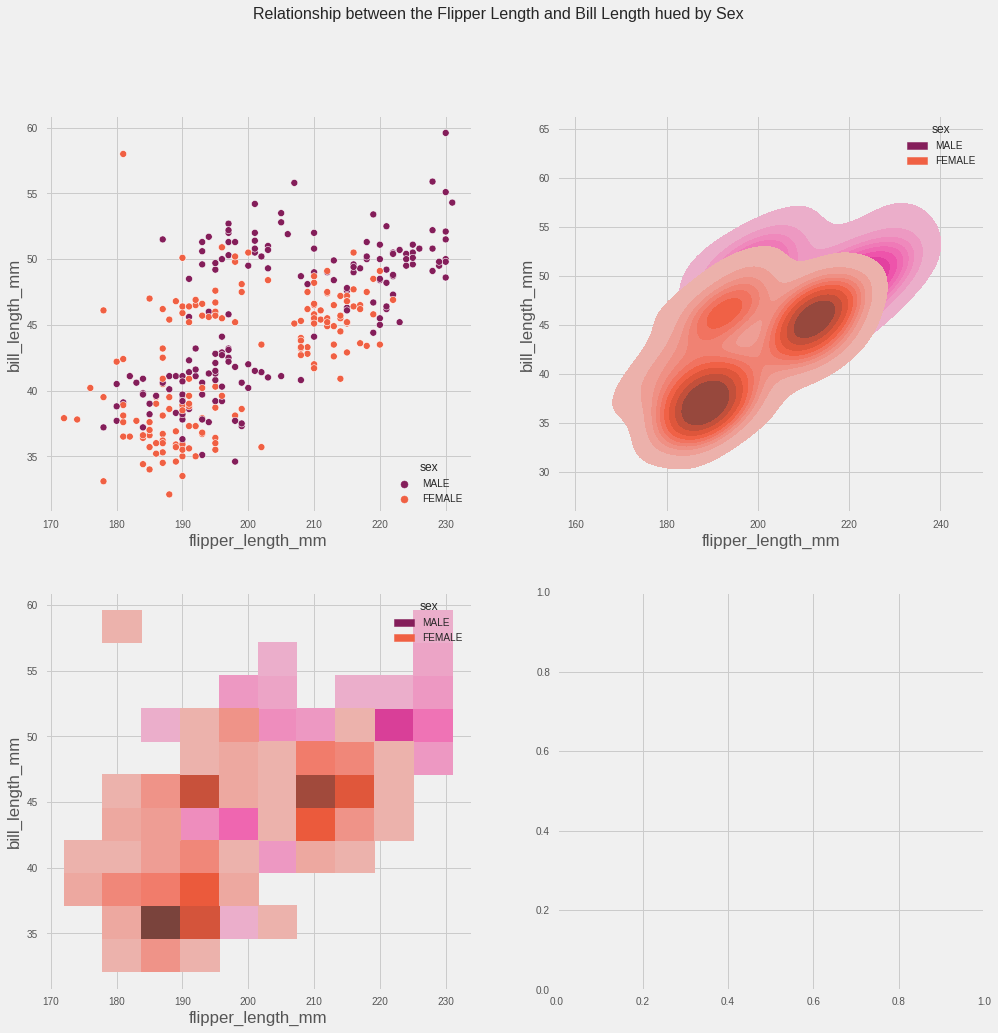

In [221]:
scatterplot(penguins_df, "flipper_length_mm", "bill_length_mm", "sex", "Relationship between the Flipper Length and Bill Length hued by Sex")

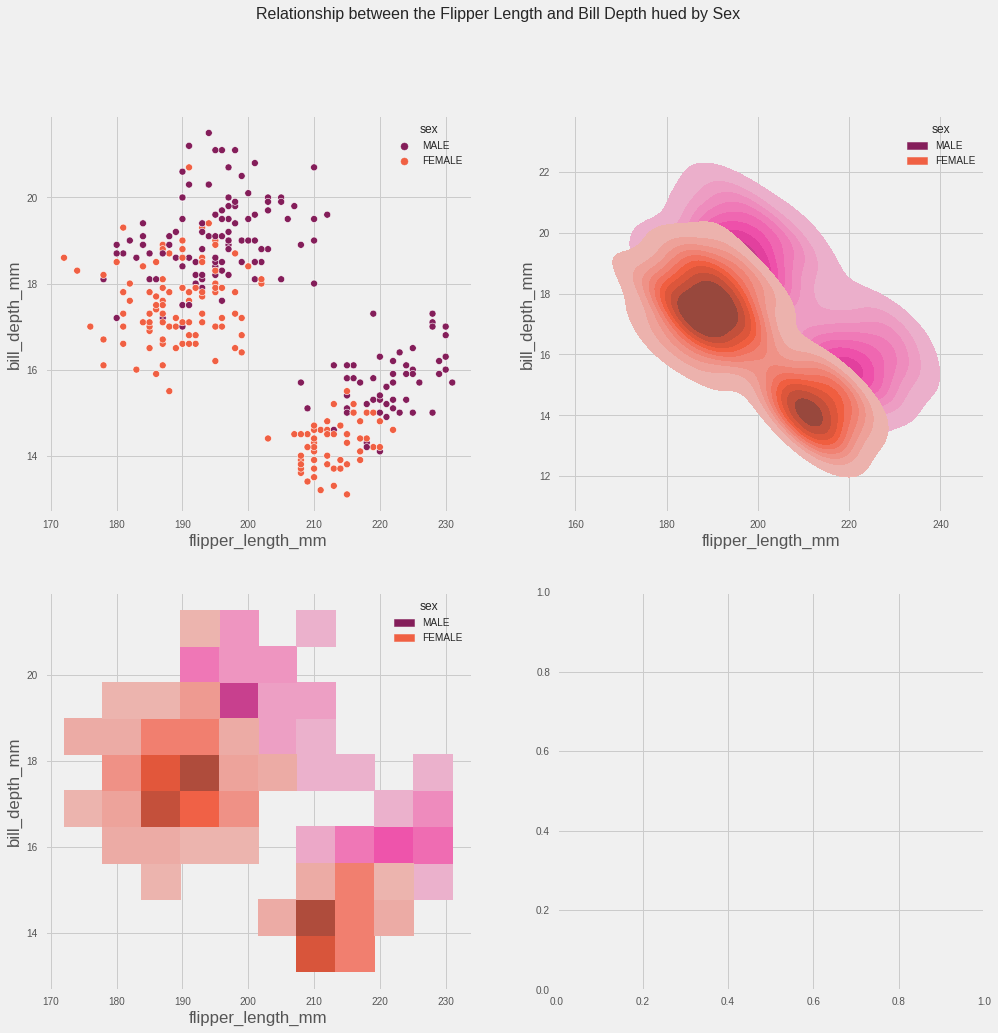

In [222]:
scatterplot(penguins_df, "flipper_length_mm", "bill_depth_mm", "sex", "Relationship between the Flipper Length and Bill Depth hued by Sex")

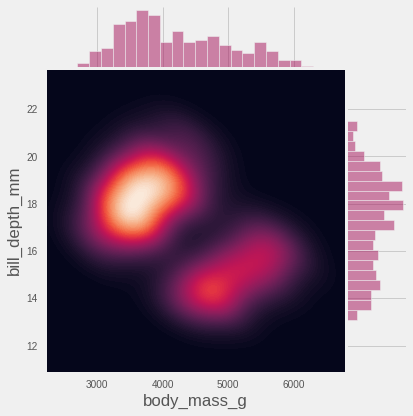

In [223]:
# Relationship between Body Mass and Bill Depth
plt.style.use("fivethirtyeight")

# Plot
g = sns.JointGrid(data=penguins_df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#A6115A", alpha=0.5, bins=20)

# Show
plt.show()

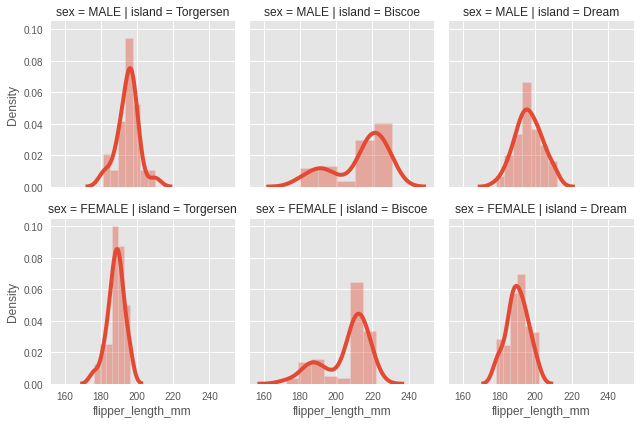

In [230]:
# (DENSITY) of Flipper Length hued by SEX
plt.style.use('ggplot')

# Plot
sns.FacetGrid(penguins_df, col="island", row="sex").map(sns.distplot, "flipper_length_mm")

# Show
plt.show()

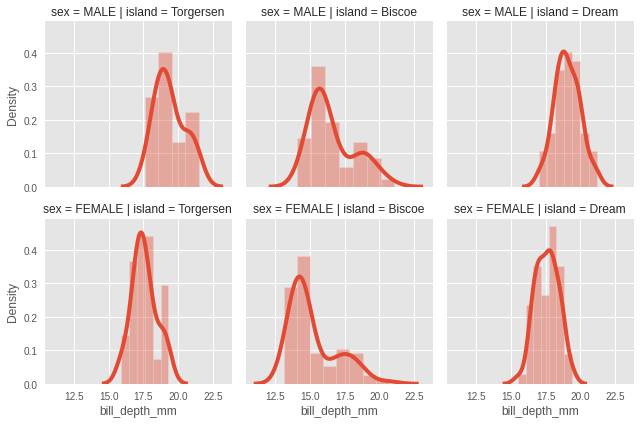

In [225]:
# (DENSITY) of flipper Bill Depth hued by SEX
plt.style.use('ggplot')

# Plot
sns.FacetGrid(penguins_df, col="island", row="sex").map(sns.distplot, "bill_depth_mm")

# Show
plt.show()

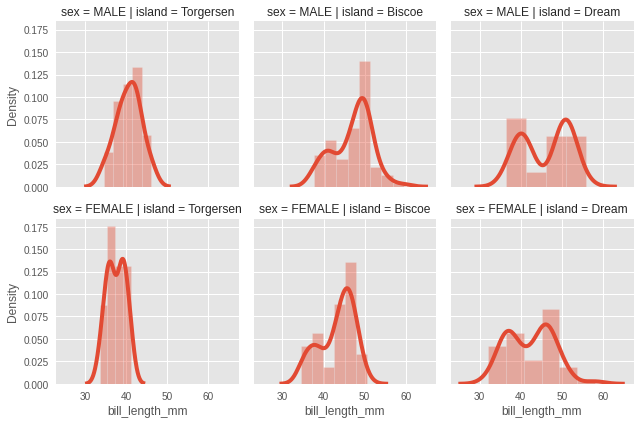

In [226]:
# (DENSITY) of Bill Length hued by SEX
plt.style.use('ggplot')

# Plot
sns.FacetGrid(penguins_df, col="island", row="sex").map(sns.distplot, "bill_length_mm")

# Show
plt.show()

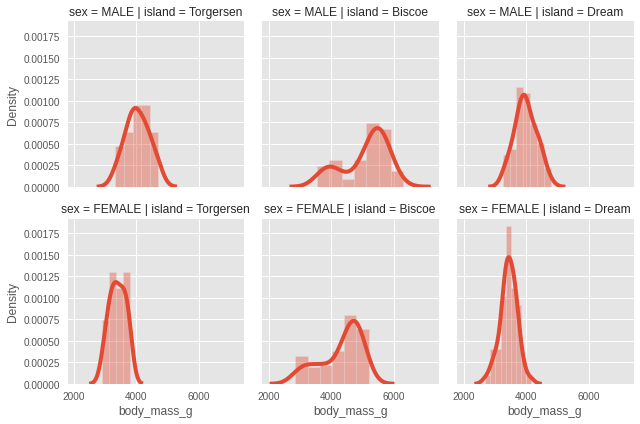

In [234]:
# (DENSITY) of Body Mass hued by SEX
plt.style.use('ggplot')

# Plot
sns.FacetGrid(penguins_df, col="island", row="sex").map(sns.distplot, "body_mass_g")

# Show
plt.show()